<a href="https://colab.research.google.com/github/hussain00/PDS-Project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
! wget https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv

--2025-02-10 15:01:30--  https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.02s   

2025-02-10 15:01:31 (3.13 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [27]:
import pandas as pd

In [67]:
df = pd.read_csv('titanic.csv')

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [68]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [70]:
mean_age = df['Age'].mean()

In [71]:
df['Age'] = df['Age'].fillna(mean_age)
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [72]:
f_data = df[['Survived', 'Sex']]

In [73]:
f_data

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [74]:
f_data = f_data.groupby(['Survived', 'Sex']).size().unstack()

In [75]:
f_data.head()

Sex,female,male
Survived,,
0,81,468
1,233,109


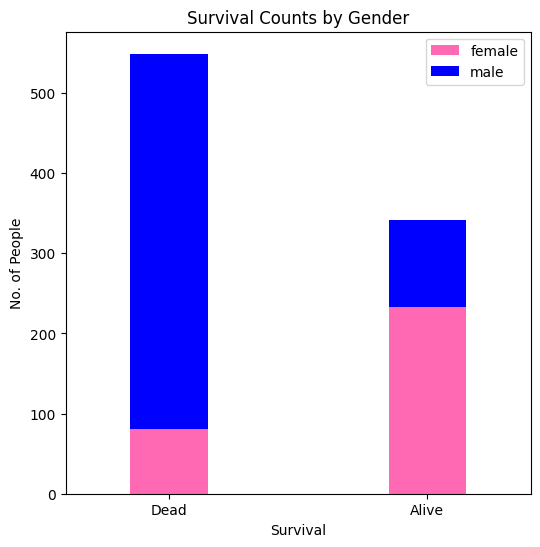

In [94]:
import matplotlib.pyplot as plt

f_data.plot(kind='bar', stacked=True, color=['hotpink', 'blue'], width=0.3, figsize=(6,6))
plt
plt.xlabel('Survival')
plt.ylabel('No. of People')
plt.title('Survival Counts by Gender')
plt.xticks(ticks =[0,1], labels=['Dead', 'Alive'], rotation=0)
plt.legend()
plt.show()

In [127]:
f2_data = df[['Survived','Pclass','Sex']]

In [128]:
f2_data = f2_data.groupby(['Survived','Pclass','Sex']).size().unstack()

In [129]:
f2_data

Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47

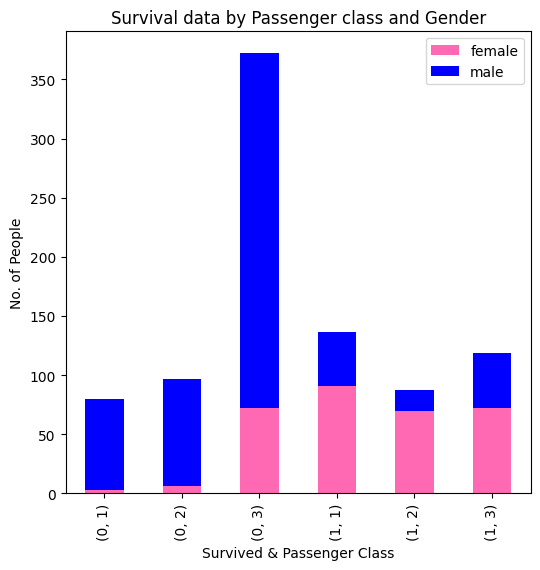

In [133]:
f2_data.plot(kind='bar', stacked=True, color=['hotpink','blue'], figsize=(6,6))

plt.xlabel('Survived & Passenger Class')
plt.ylabel('No. of People')
plt.title('Survival data by Passenger class and Gender')
plt.legend()
plt.show()

In [131]:
f3_data = df[['Survived','Pclass']]

In [132]:
f3_data = f3_data.groupby(['Survived','Pclass']).size().unstack()

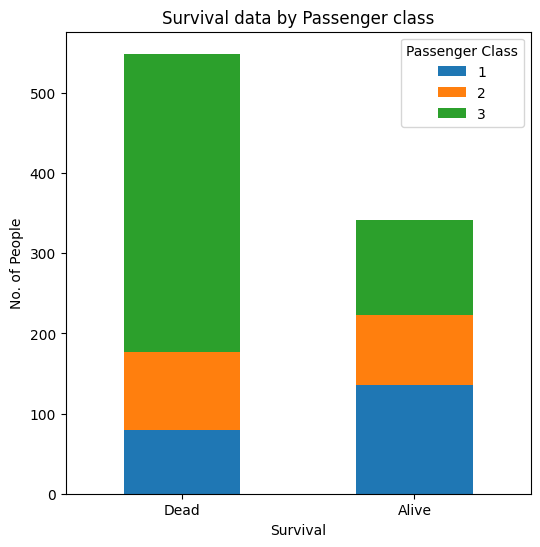

In [138]:
f3_data.plot(kind='bar', stacked=True, figsize=(6,6))

plt.xlabel('Survival')
plt.ylabel('No. of People')
plt.title('Survival data by Passenger class')
plt.xticks(ticks =[0,1], labels=['Dead', 'Alive'], rotation=0)
plt.legend(title='Passenger Class')
plt.show()

In [139]:
def categorize_age(age):
  if age <= 16:
    return 0
  elif age <= 26:
    return 1
  elif age <= 36:
    return 2
  elif age <= 62:
    return 3
  else:
    return 4

In [140]:
df['AgeClass'] = df['Age'].apply(categorize_age)

In [144]:
df = df.drop('Age', axis = 1)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     889 non-null    object 
 11  AgeClass     891 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [146]:
f4_data = df[['Survived', 'AgeClass']]

In [148]:
f4_data = f4_data.groupby(['Survived', 'AgeClass']).size().unstack()

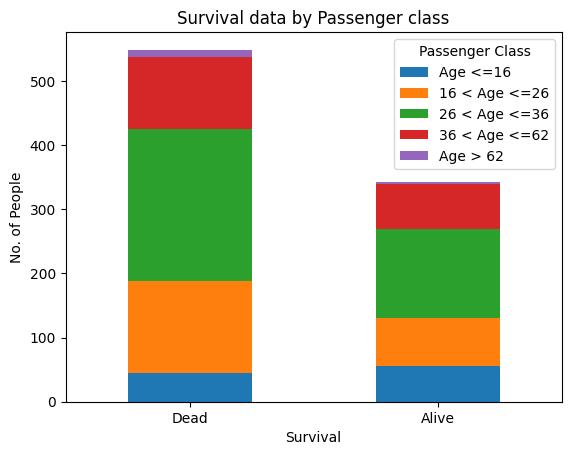

In [153]:
f4_data.plot(kind='bar', stacked=True)

legend_entries = ['Age <=16','16 < Age <=26','26 < Age <=36','36 < Age <=62','Age > 62']
plt.xlabel('Survival')
plt.ylabel('No. of People')
plt.title('Survival data by Passenger class')
plt.xticks(ticks =[0,1], labels=['Dead', 'Alive'], rotation=0)
plt.legend(title='Passenger Class', labels=legend_entries)
plt.show()